# Movies Rating Analytics

## Import Libraries

In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Import Data Set

In [308]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

### Explore Data Set

In [309]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [310]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rotten Tomatoes Ratings %,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
Audience Ratings %,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budget (million $),559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year of release,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [311]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


----

### Code
#### Dataset Preparation

In [312]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [313]:
movies.columns = ['film', 'genre', 'critic_rating', 'audience_rating',
                  'budget', 'year']

In [314]:
movies.describe()

,critic_rating,audience_rating,budget,year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [315]:
# Change film title, genre, and year into category fields 
movies.film = movies.film.astype('category')
movies.genre = movies.genre.astype('category')
movies.year = movies.year.astype('category')

In [316]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
critic_rating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
audience_rating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
budget,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


#### JointPlot

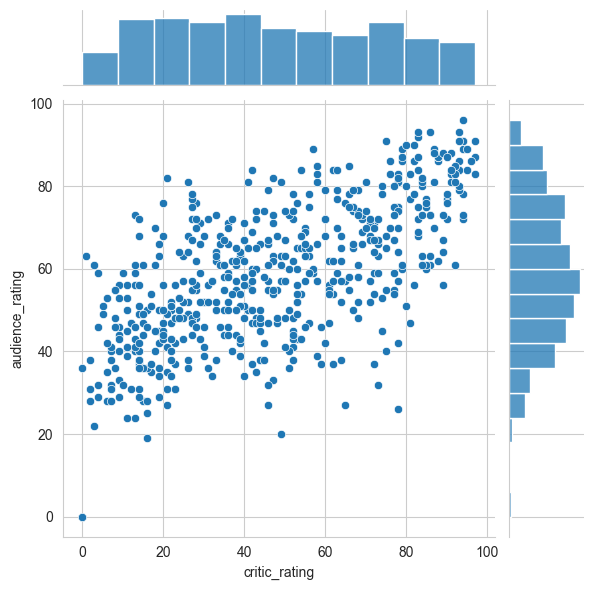

In [317]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating')

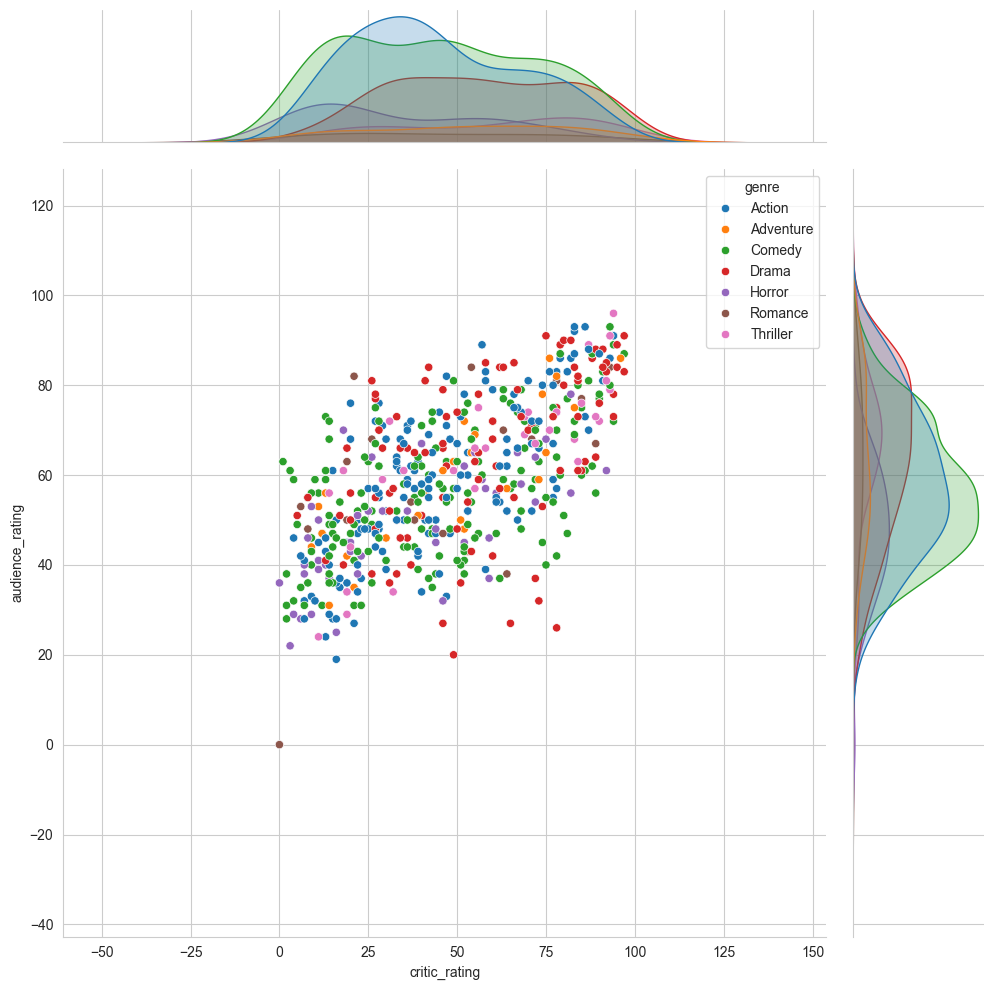

In [318]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating', hue='genre', height=10)

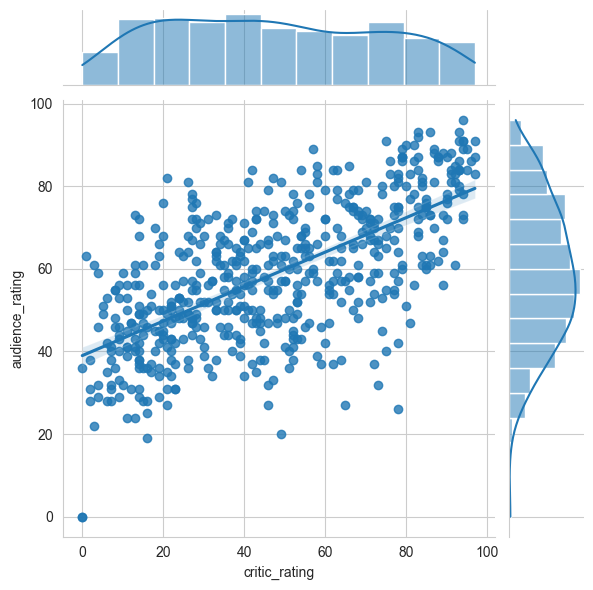

In [319]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating', kind='reg')

#### Histogram

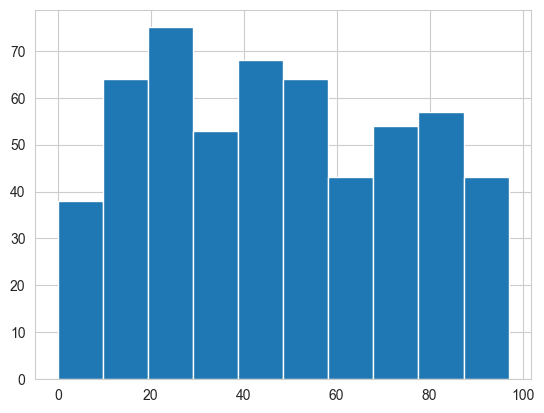

In [320]:
hist1 = plt.hist(movies.critic_rating)

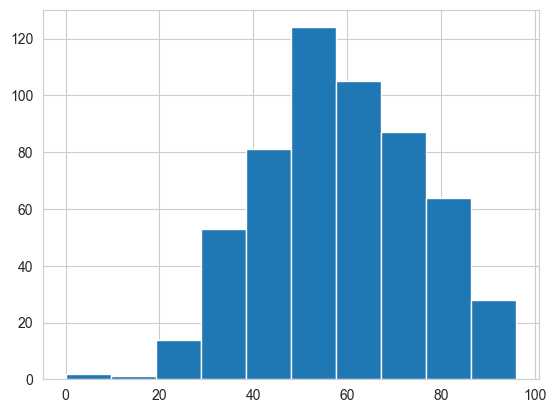

In [321]:
hist2 = plt.hist(movies.audience_rating)

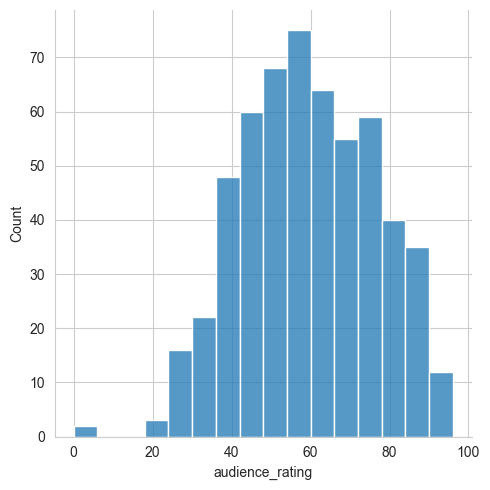

In [322]:
sns.displot(data=movies.audience_rating)

In [323]:
movies[(movies.critic_rating == 0) | (movies.audience_rating == 0)]

,film,genre,critic_rating,audience_rating,budget,year
285,One Missed Call,Horror,0,36,20,2008
293,Paranormal Activity 2,Horror,0,0,3,2010
354,Something Borrowed,Romance,0,0,35,2011


#### Stacked Histogram

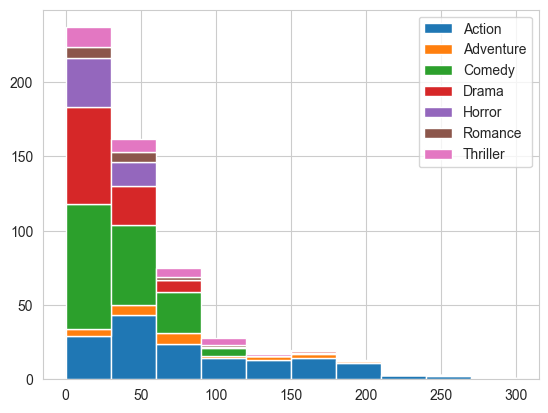

In [324]:
genres = movies.genre.cat.categories

budget_per_genre_hist_bars = []
for genre in genres:
    budget_per_genre_hist_bars.append(movies[movies.genre == genre].budget)

plt.hist(budget_per_genre_hist_bars, stacked=True, bins=10, label=genres)
plt.legend()
plt.show()

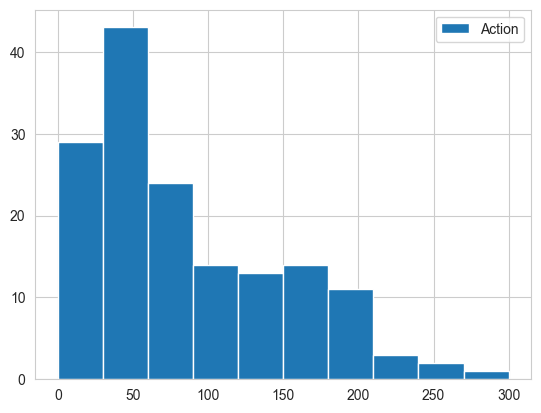

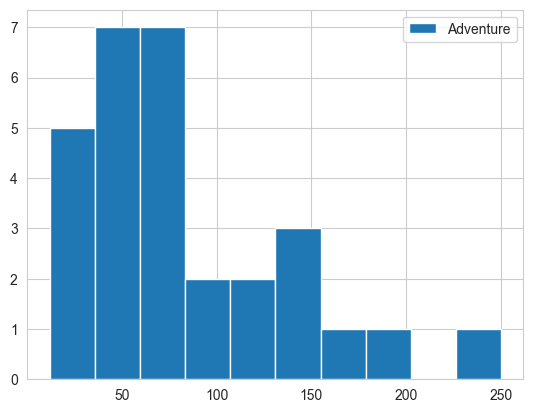

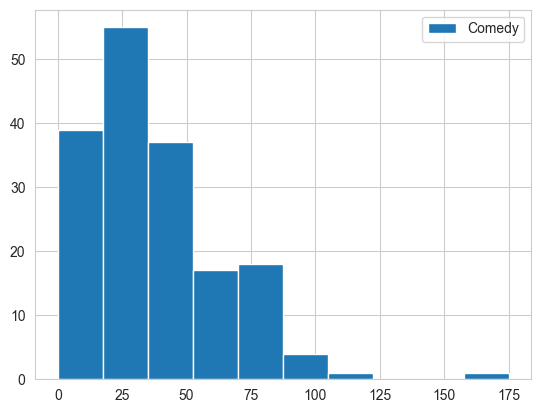

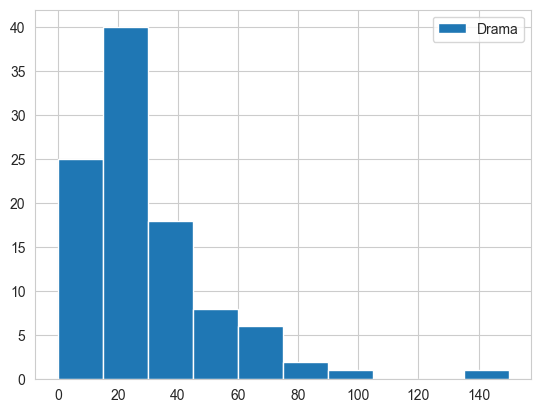

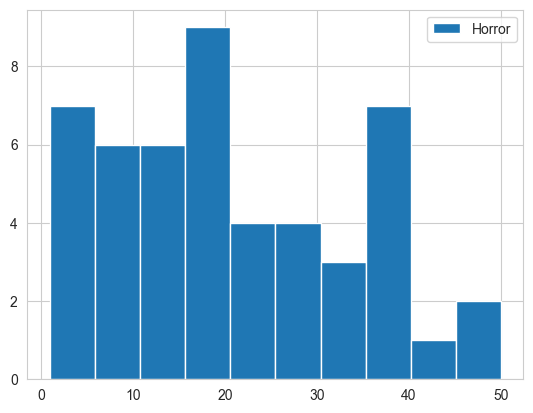

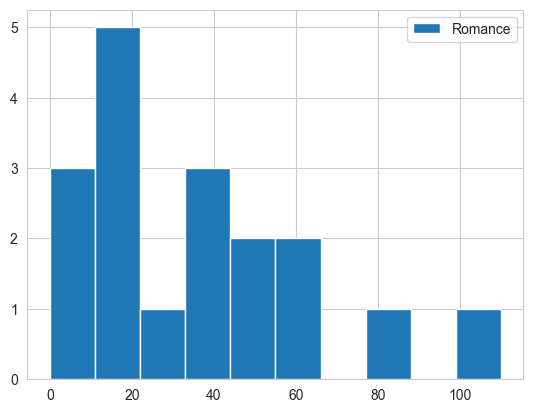

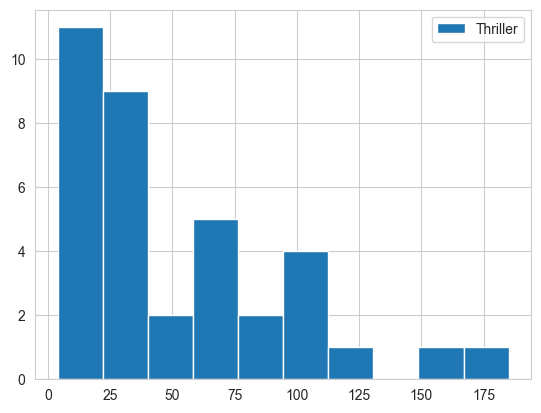

In [325]:
genres = movies.genre.cat.categories

budget_per_genre_hist_bars = []
for genre in genres:
    # budget_per_genre_hist_bars.append(movies[movies.genre == genre].budget)
    plt.hist(movies[movies.genre == genre].budget, stacked=True, bins=10, label=[genre])
    plt.legend()
    plt.show()

#### Kernel Density Estimate - KDE - Plots 

<Axes: xlabel='critic_rating', ylabel='audience_rating'>

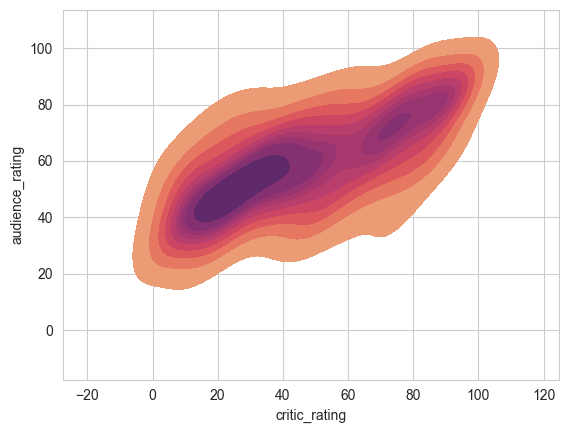

In [326]:
sns.kdeplot(data=movies, x=movies.critic_rating, y=movies.audience_rating, fill=True, cmap='flare')

#### Subplots

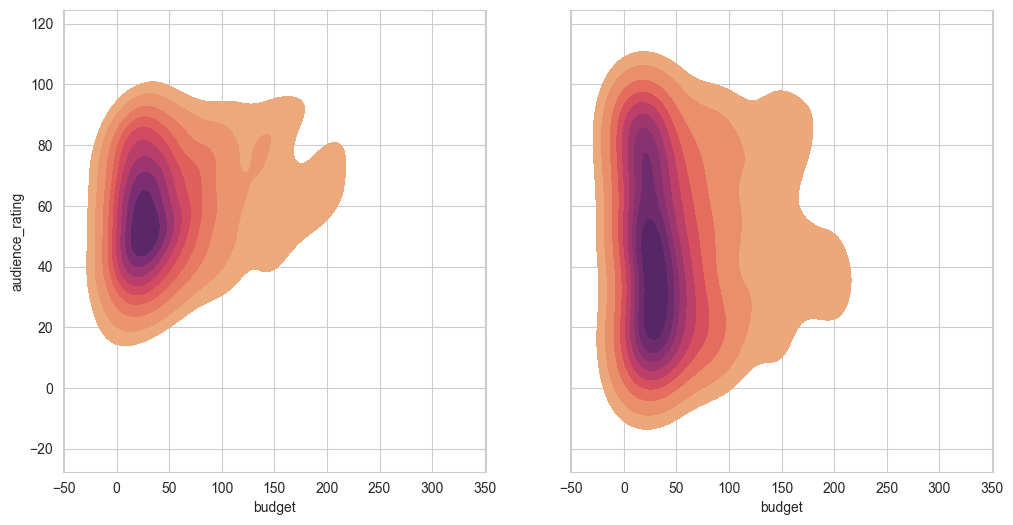

In [327]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
aud_budg_kde = sns.kdeplot(
    data=movies,
    x=movies.budget,
    y=movies.audience_rating,
    fill=True,
    cmap='flare',
    ax=axes[0],
    label='Audience vs. Budget'
)
crit_budg_kde = sns.kdeplot(
    data=movies,
    x=movies.budget,
    y=movies.critic_rating,
    fill=True,
    cmap='flare',
    ax=axes[1],
    label='Critical vs. Budget'
)

<Axes: xlabel='budget', ylabel='critic_rating'>

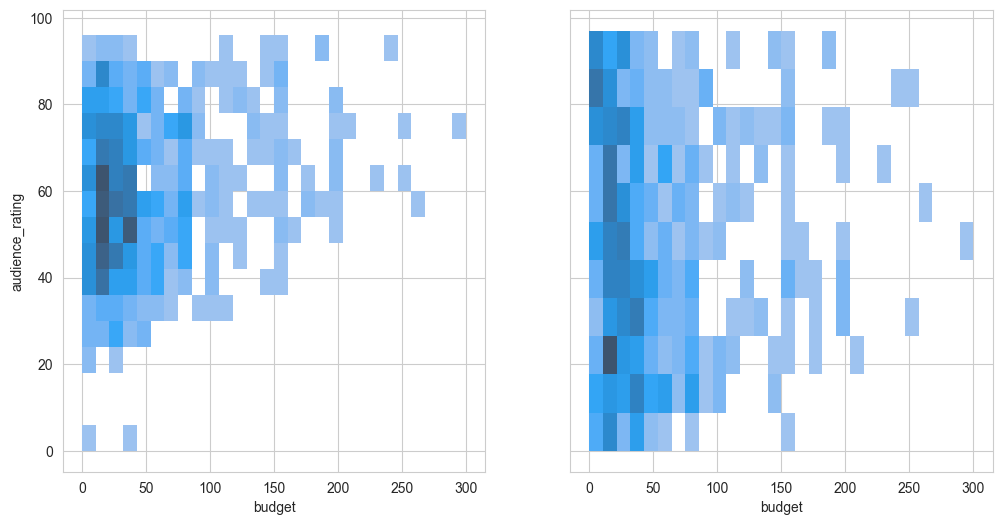

In [328]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
sns.histplot(data=movies, x=movies.budget, y=movies.audience_rating, ax=axes[0])
sns.histplot(data=movies, x=movies.budget, y=movies.critic_rating, ax=axes[1])

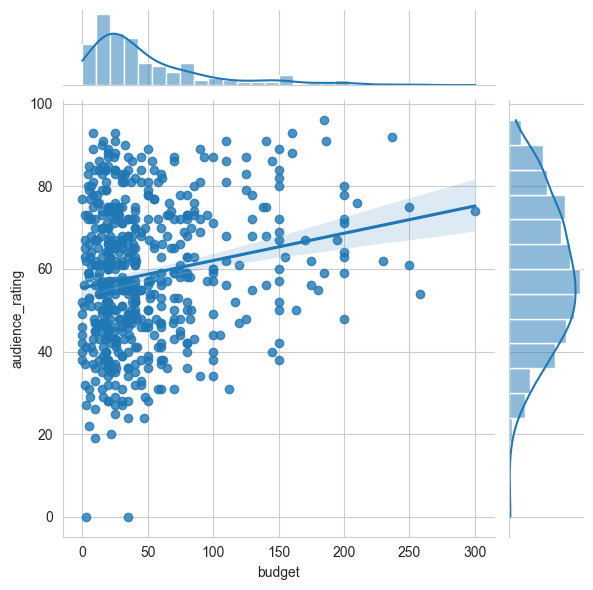

In [329]:
sns.jointplot(data=movies, x=movies.budget, y=movies.audience_rating, kind='reg')

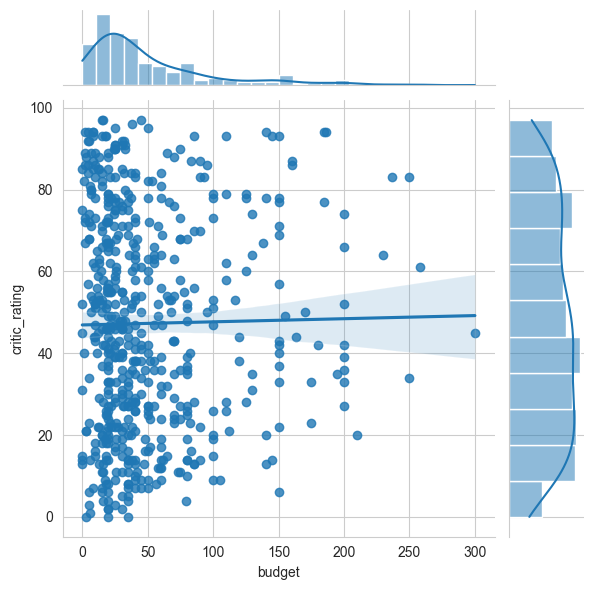

In [330]:
sns.jointplot(data=movies, x=movies.budget, y=movies.critic_rating, kind='reg')

#### Violin Plots vs Box Plots

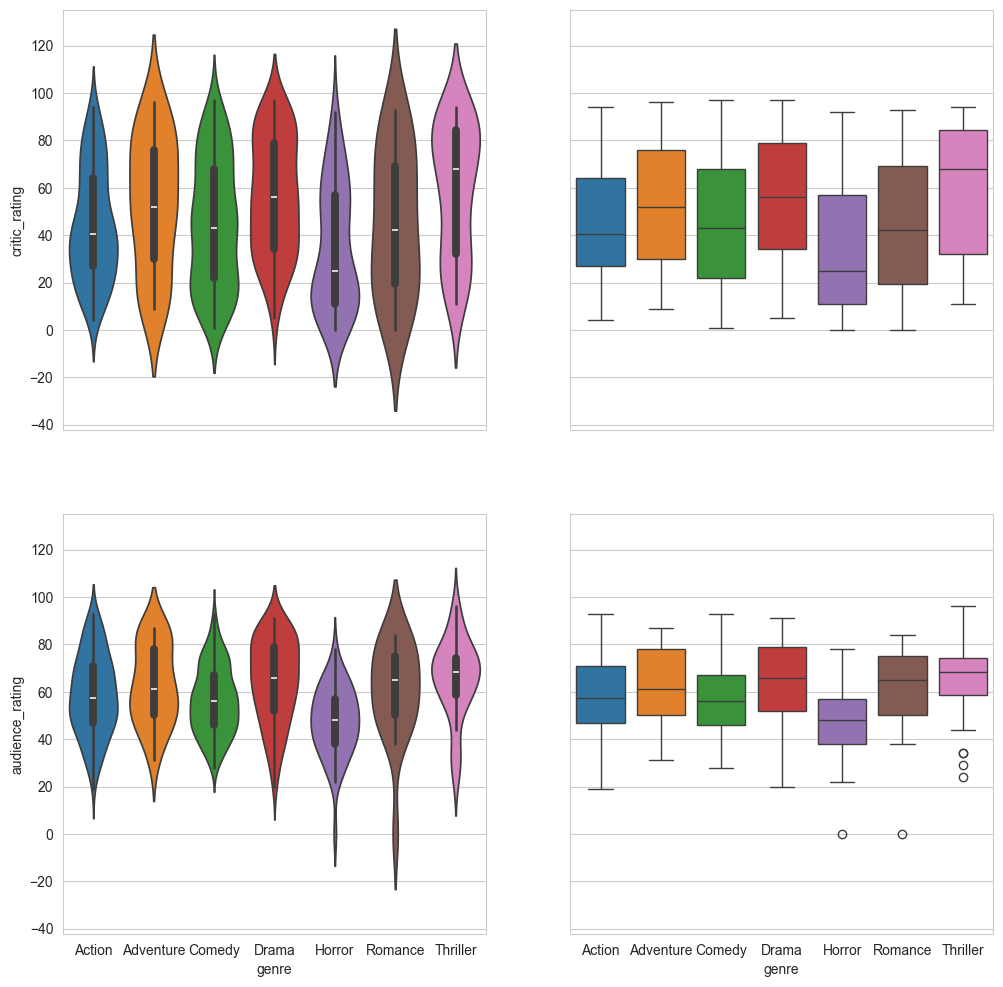

In [331]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True, sharex=True)
violin_critic_per_genre = sns.violinplot(data=movies,
                                         x=movies.genre,
                                         y=movies.critic_rating,
                                         hue=movies.genre,
                                         ax=axes[0, 0])
box_critic_per_genre = sns.boxplot(data=movies,
                                   x=movies.genre,
                                   y=movies.critic_rating,
                                   hue=movies.genre,
                                   ax=axes[0, 1])
violin_aud_per_genre = sns.violinplot(data=movies,
                                      x=movies.genre,
                                      y=movies.audience_rating,
                                      hue=movies.genre,
                                      ax=axes[1, 0])
box_aud_per_genre = sns.boxplot(data=movies,
                                x=movies.genre,
                                y=movies.audience_rating,
                                hue=movies.genre,
                                ax=axes[1, 1])

#### Facet Grids

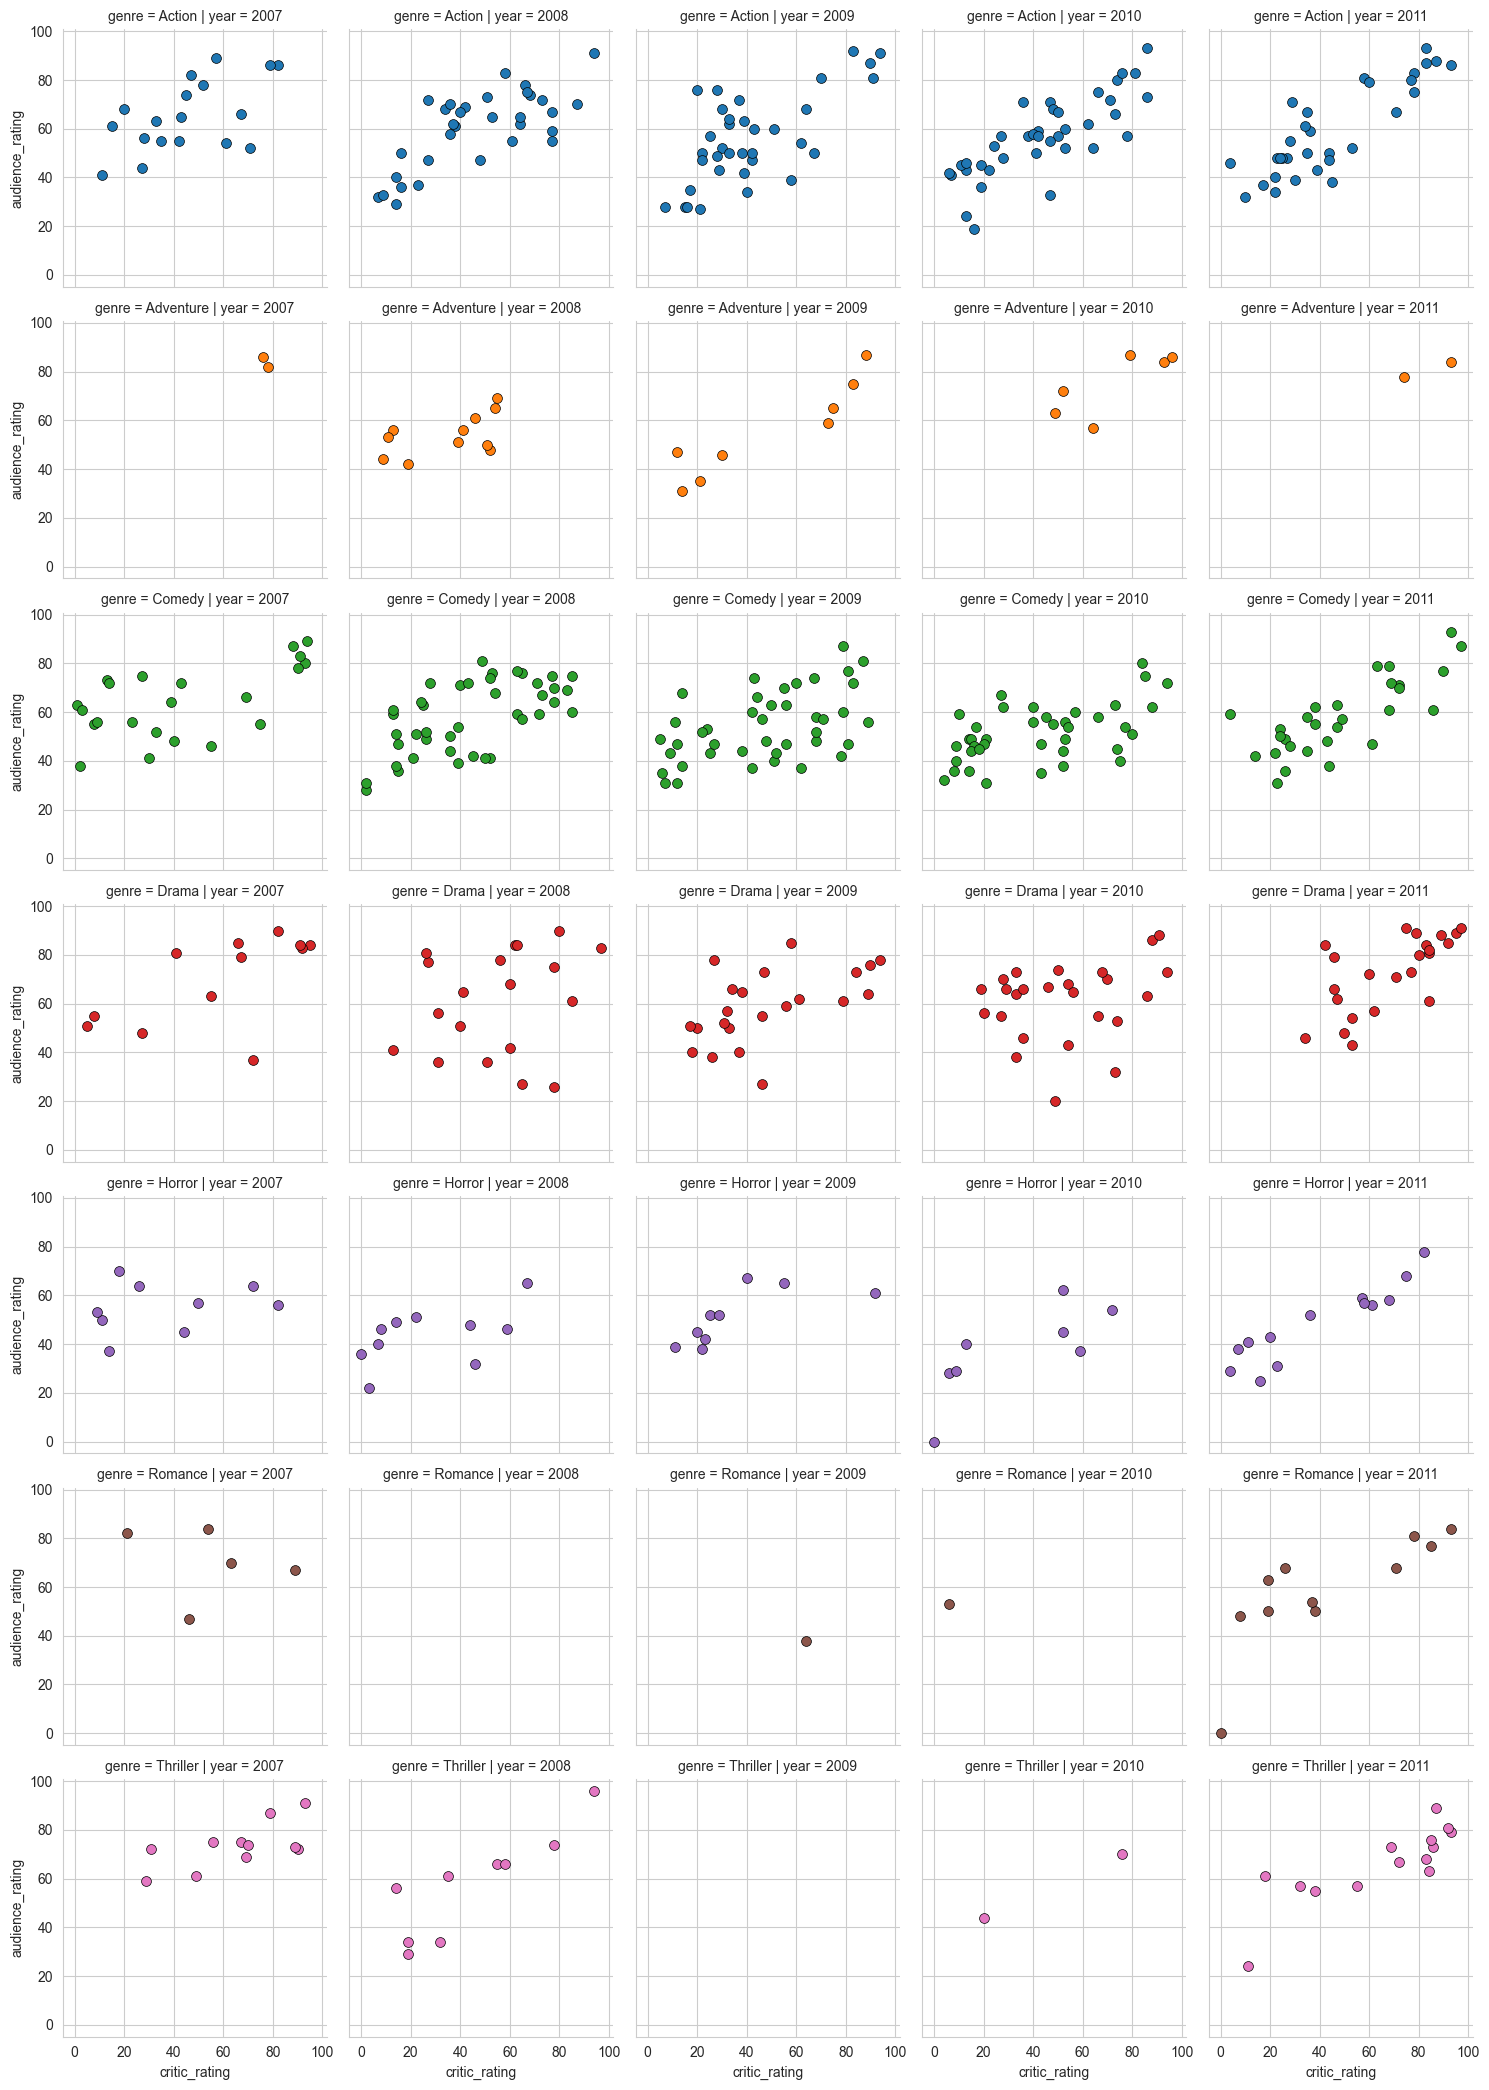

In [332]:
g = sns.FacetGrid(movies, hue='genre', row='genre', col='year')
kws = {'s': 50, 'edgecolor': 'black', 'linewidth': 0.5}
g = g.map(plt.scatter, 'critic_rating', 'audience_rating', **kws)

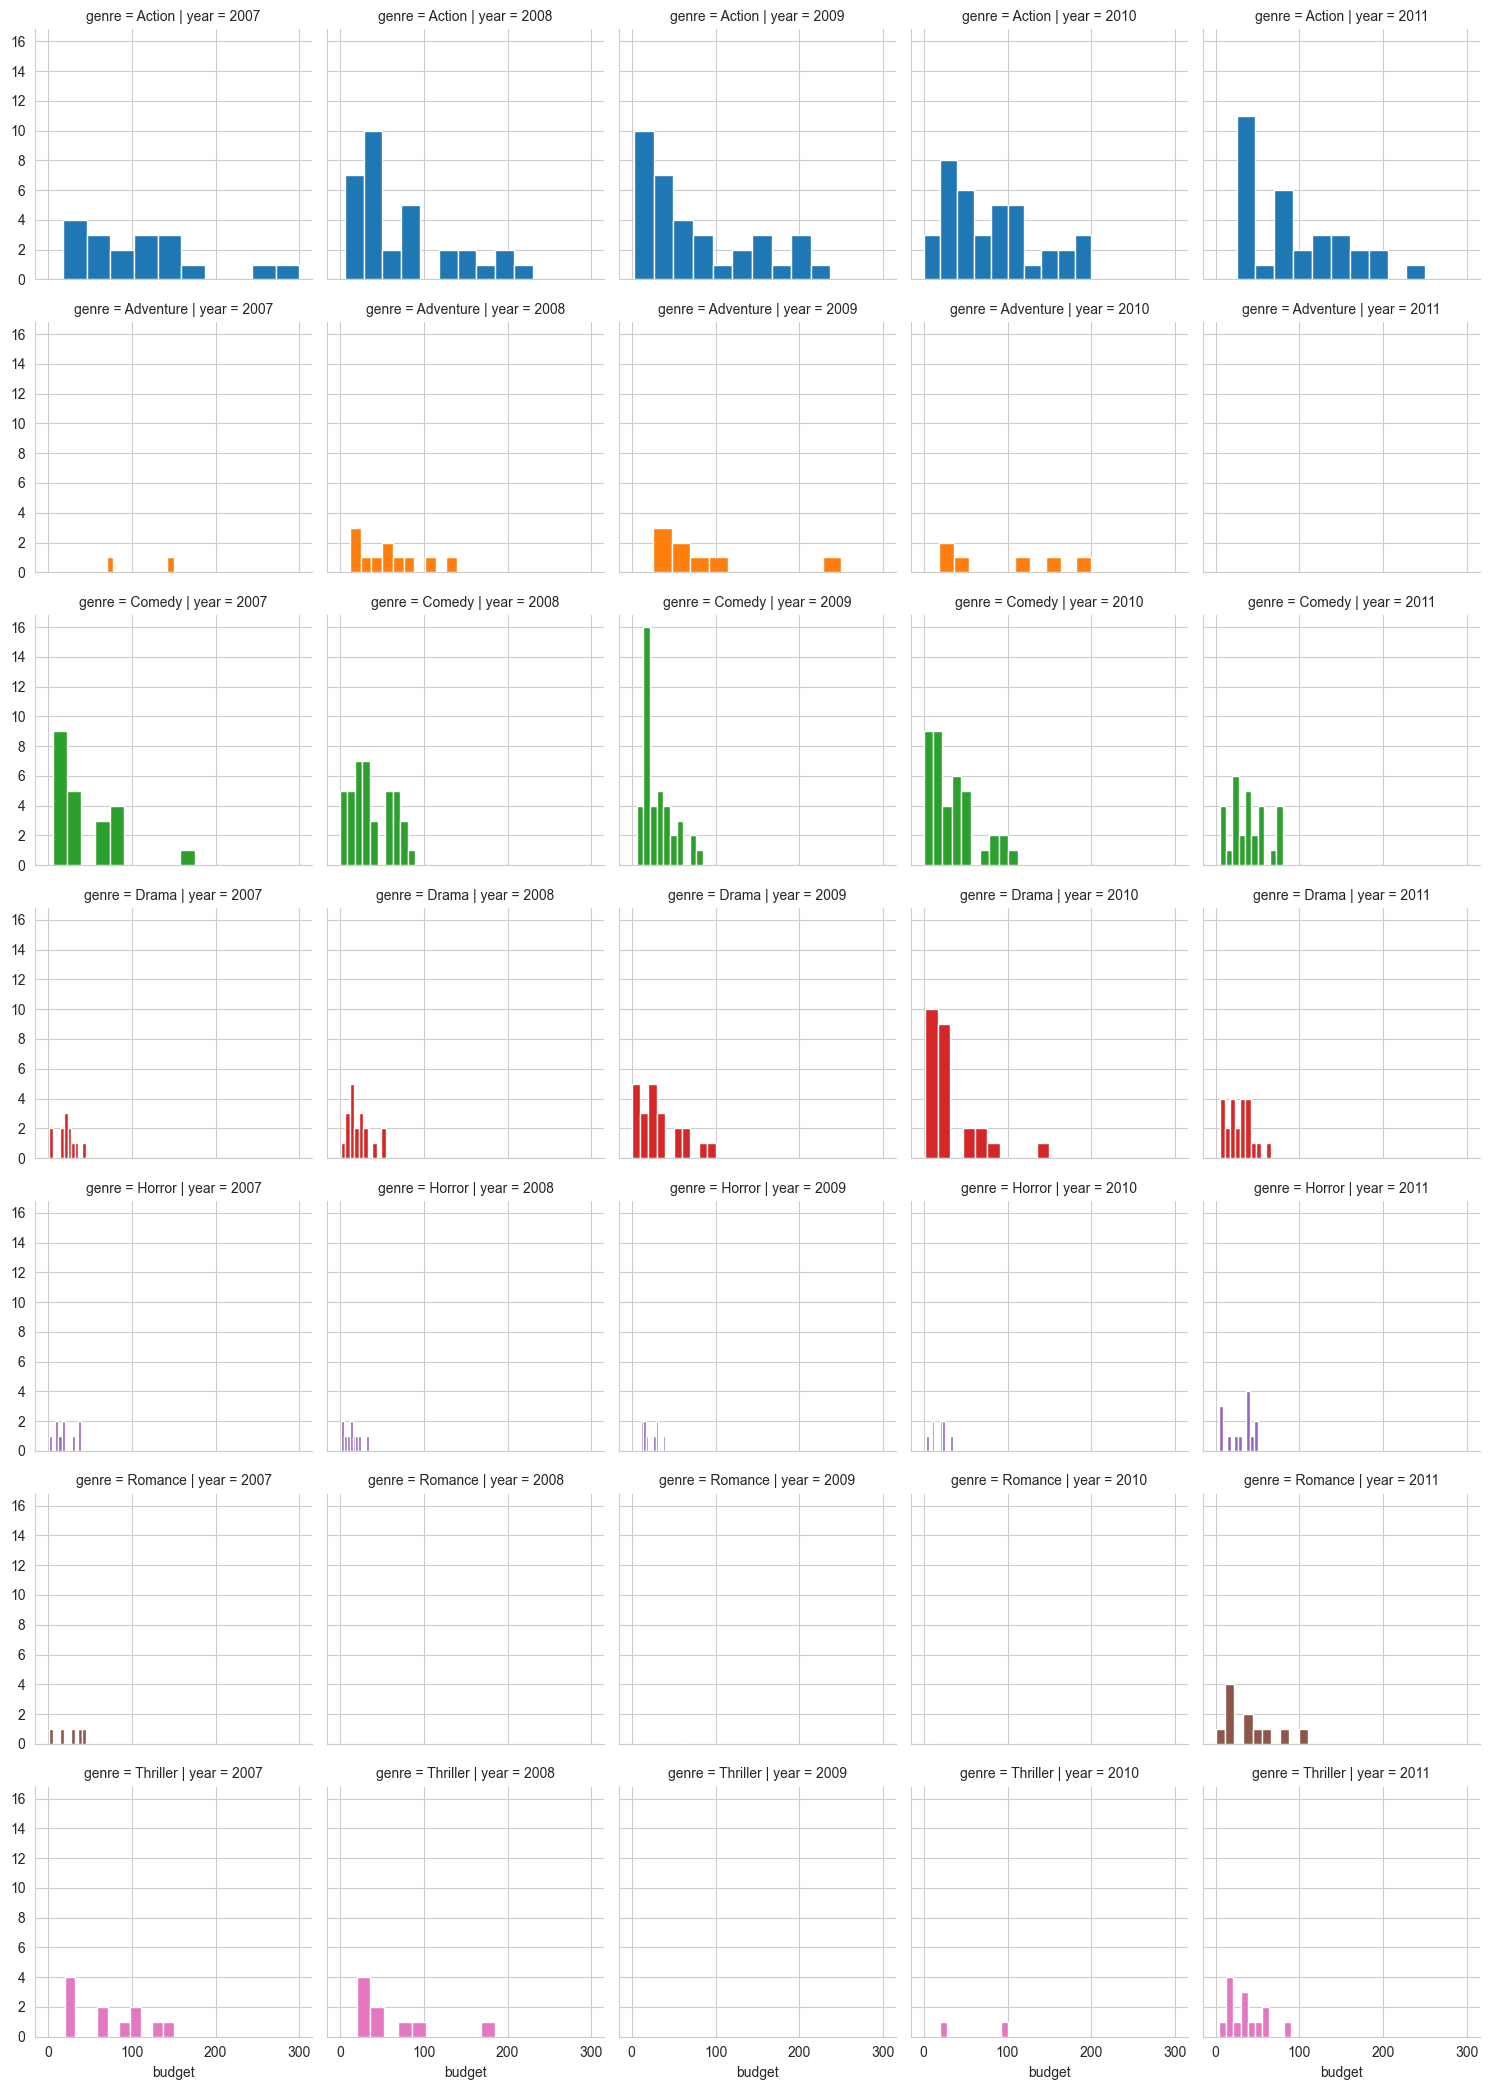

In [333]:
budget_per_genre_per_year = sns.FacetGrid(movies, hue='genre', row='genre', col='year')
budget_per_genre_per_year = budget_per_genre_per_year.map(plt.hist, 'budget')

#### Controlling Axes & Diagonals

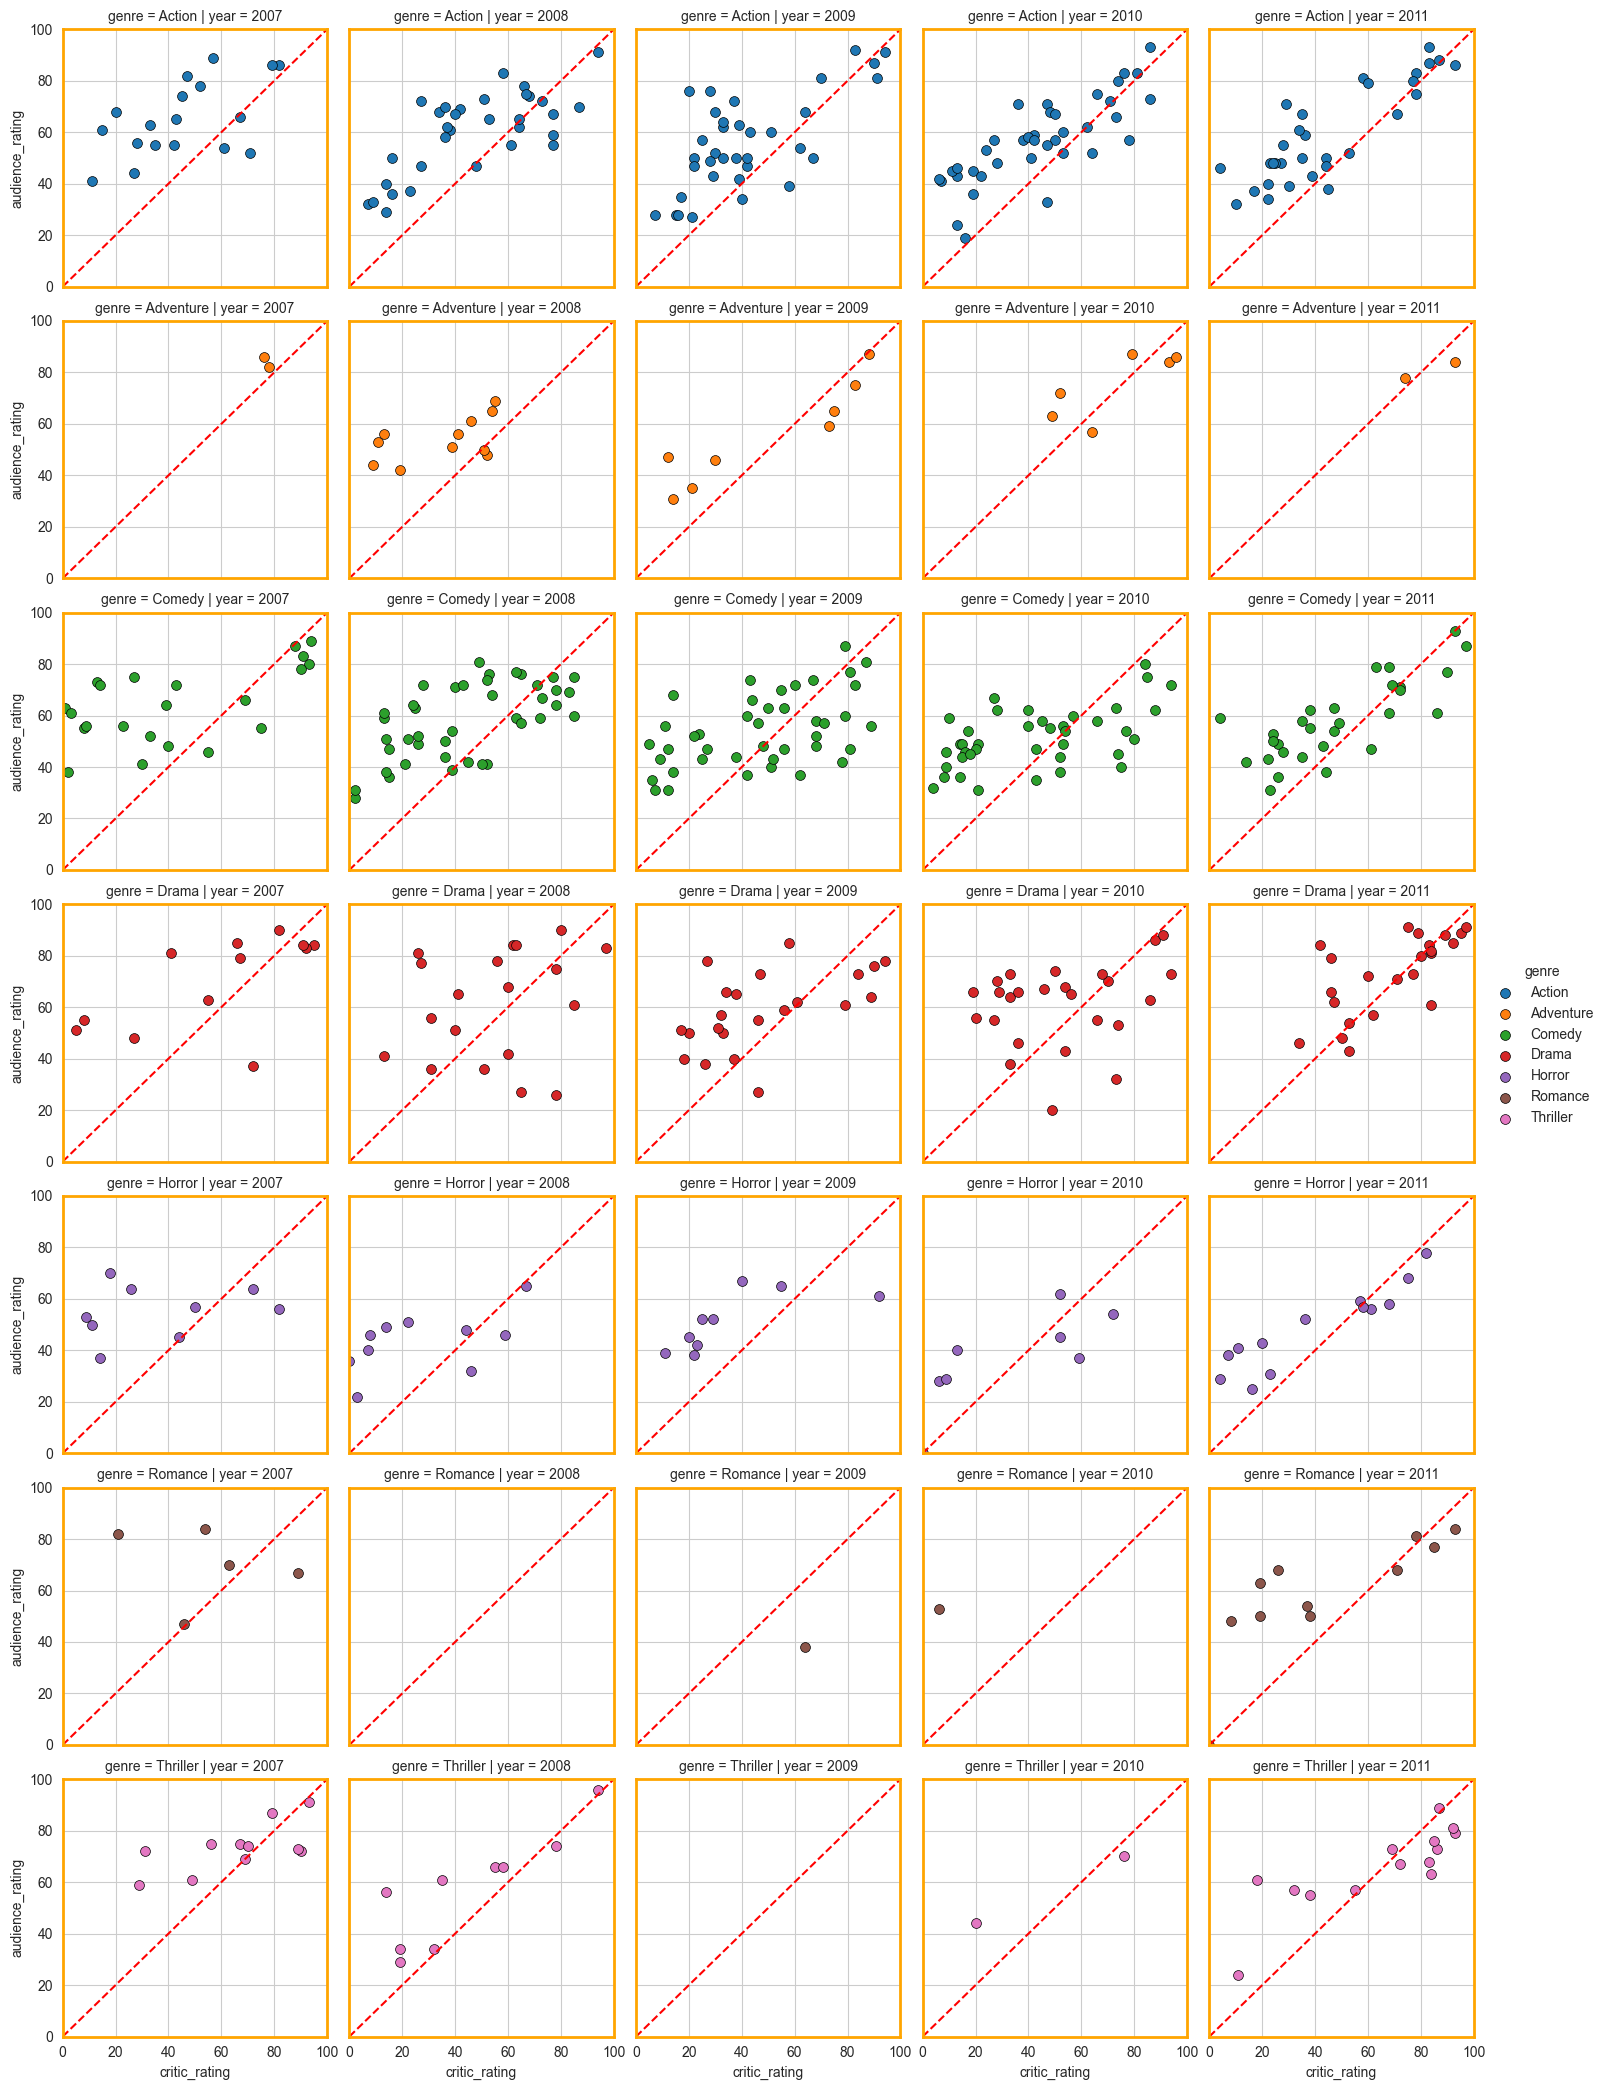

In [334]:

new_grid = sns.FacetGrid(movies, hue='genre', row='genre', col='year', despine=False)
kws = {'s': 50, 'edgecolor': 'black', 'linewidth': 0.5}
new_grid = new_grid.map(plt.scatter, 'critic_rating', 'audience_rating', **kws)

new_grid.set(xlim=(0, 100), ylim=(0, 100))

for ax in new_grid.axes.flat:
    ax.plot([0, 100], [0, 100], c="red", ls='--')
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('orange')
        spine.set_linewidth(2)

new_grid.add_legend()

# Dashboards

[Text(0.5, 0, 'Budget (in Millions)'),
 Text(0, 0.5, 'Movies Count'),
 Text(0.5, 1.0, 'Movies Cost per Genre')]

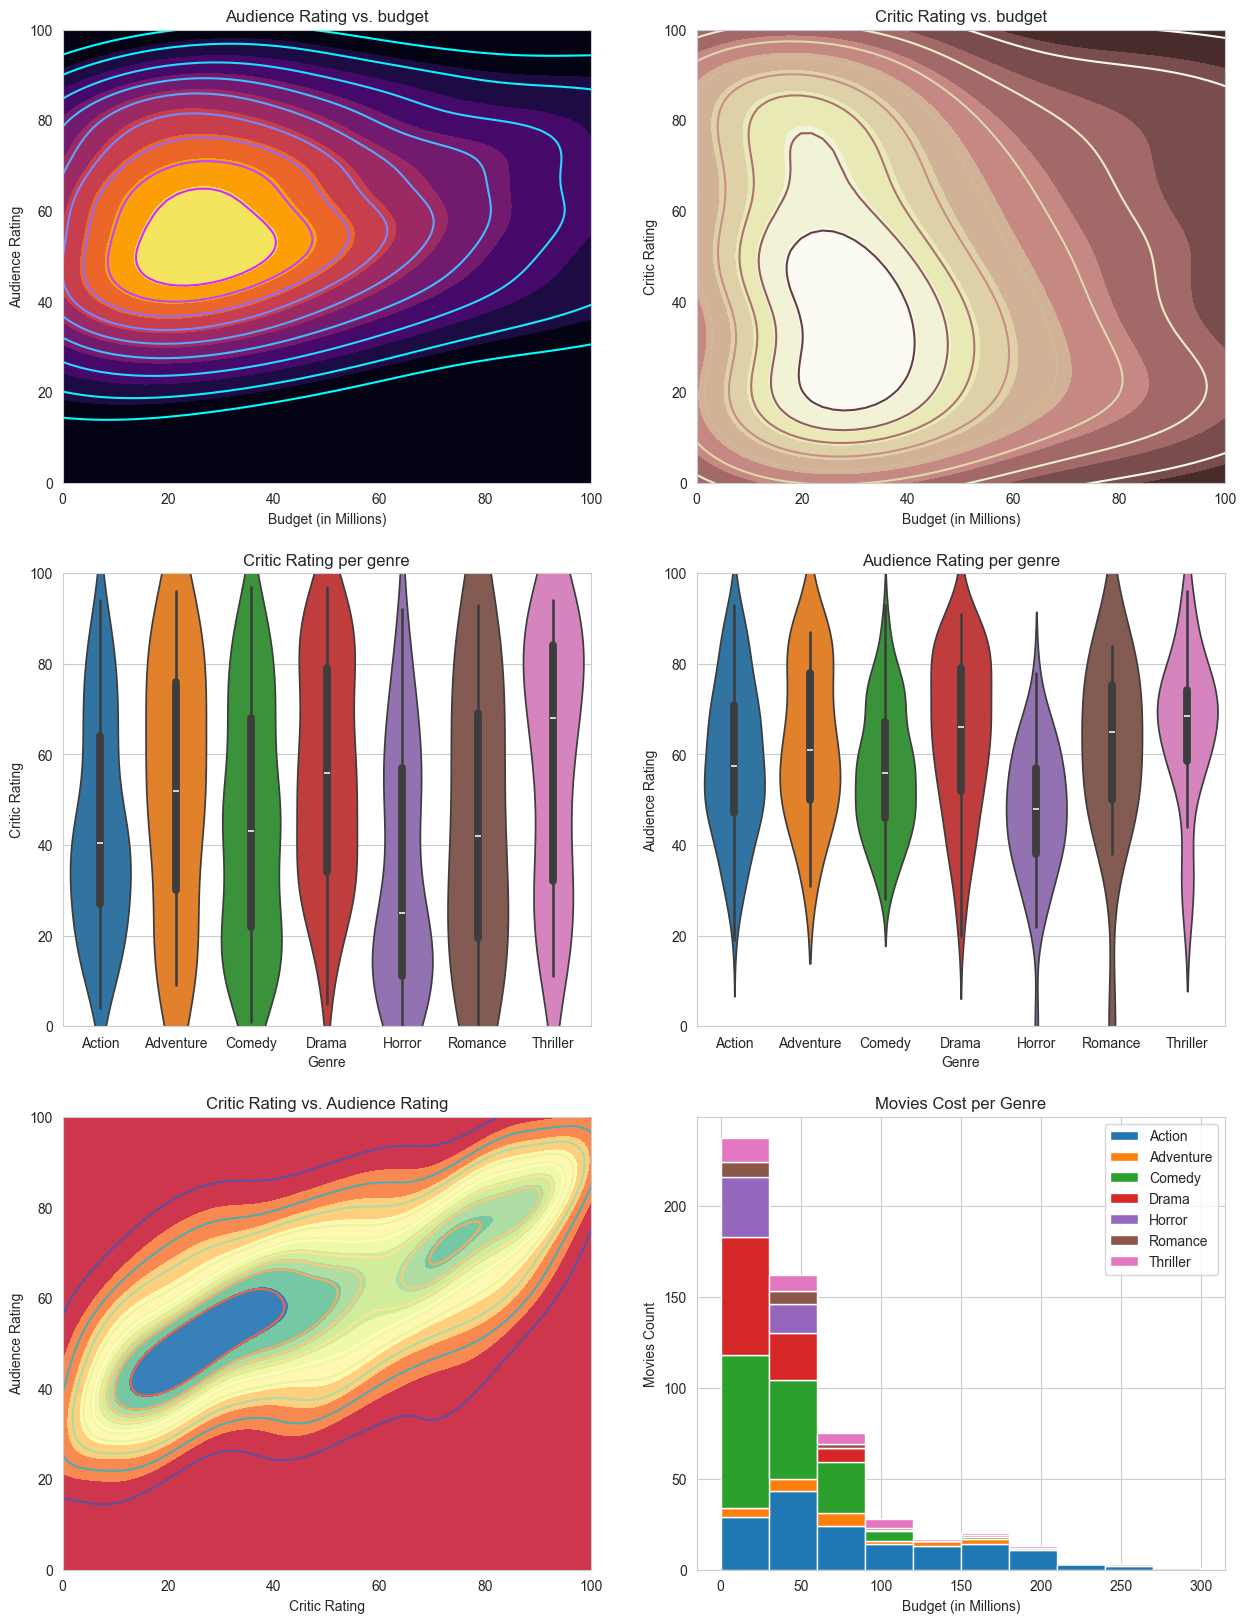

In [335]:
# sns.set_style('white', {'axes.facecolor': 'darkgrey'})
sns.set_style('whitegrid')
_, axes = plt.subplots(3, 2, figsize=(15, 20))
## 0,0
a_fill = sns.kdeplot(x=movies.budget, y=movies.audience_rating, ax=axes[0, 0], fill=True, cmap='inferno', thresh=0)
a_outline = sns.kdeplot(x=movies.budget, y=movies.audience_rating, ax=axes[0, 0], cmap='cool')
a_fill.set(xlim=(0, 100), ylim=(0, 100))
a_outline.set(xlim=(0, 100), ylim=(0, 100))
a_fill.set(xlabel='Budget (in Millions)', ylabel='Audience Rating', title='Audience Rating vs. budget')

## 0,1
b_fill = sns.kdeplot(x=movies.budget, y=movies.critic_rating, ax=axes[0, 1], fill=True, cmap='pink', thresh=0)
b_outline = sns.kdeplot(x=movies.budget, y=movies.critic_rating, ax=axes[0, 1], cmap='pink_r')
b_fill.set(xlim=(0, 100), ylim=(0, 100))
b_outline.set(xlim=(0, 100), ylim=(0, 100))
b_fill.set(xlabel='Budget (in Millions)', ylabel='Critic Rating', title='Critic Rating vs. budget')

## 1,0
c = sns.violinplot(data=movies,
                   x=movies.genre,
                   y=movies.critic_rating,
                   hue=movies.genre,
                   ax=axes[1, 0])
c.set(ylim=(0, 100))
c.set(xlabel='Genre', ylabel='Critic Rating', title='Critic Rating per genre')

## 1,1
d = sns.violinplot(data=movies,
                   x=movies.genre,
                   y=movies.audience_rating,
                   hue=movies.genre,
                   ax=axes[1, 1])
d.set(ylim=(0, 100))
d.set(xlabel='Genre', ylabel='Audience Rating', title='Audience Rating per genre')

## 2,0
e_fill = sns.kdeplot(x=movies.critic_rating, y=movies.audience_rating, ax=axes[2, 0], fill=True, cmap='Spectral',
                     thresh=0)
e_outline = sns.kdeplot(x=movies.critic_rating, y=movies.audience_rating, ax=axes[2, 0], cmap='Spectral_r')
e_fill.set(xlim=(0, 100), ylim=(0, 100))
e_outline.set(xlim=(0, 100), ylim=(0, 100))
e_fill.set(xlabel='Critic Rating', ylabel='Audience Rating', title='Critic Rating vs. Audience Rating')

## 2,1
genres = movies.genre.cat.categories

budget_per_genre_hist_bars = []
for genre in genres:
    budget_per_genre_hist_bars.append(movies[movies.genre == genre].budget)

axes[2, 1].hist(budget_per_genre_hist_bars, stacked=True, bins=10, label=genres)
axes[2, 1].legend()
axes[2, 1].set(xlabel='Budget (in Millions)', ylabel='Movies Count', title='Movies Cost per Genre')


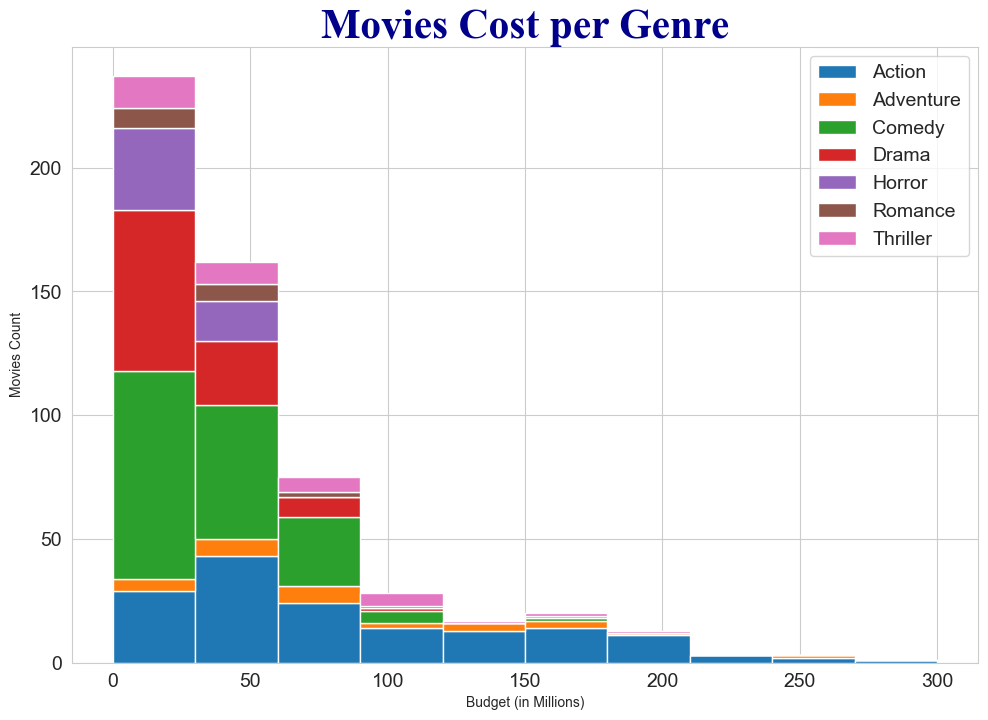

In [336]:
fig, axes = plt.subplots()
fig.set_size_inches(11.7, 8, 27)
genres = movies.genre.cat.categories

budget_per_genre_hist_bars = []
for genre in genres:
    budget_per_genre_hist_bars.append(movies[movies.genre == genre].budget)

plt.hist(budget_per_genre_hist_bars, stacked=True, bins=10, label=genres)

plt.xlabel('Budget (in Millions)')
plt.ylabel('Movies Count')
plt.title('Movies Cost per Genre', fontsize=30, color='darkblue', fontweight='bold', fontname='Times New Roman')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})

plt.show()